# Memory Requirements
- Feasible grid size is severely limited by memory requirements

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import humanfriendly as hf

In [3]:
%matplotlib inline

In [4]:
def sizeof_fmt(num, suffix='B'):
    """Human-readable bytes: https://stackoverflow.com/questions/1094841/reusable-library-to-get-human-readable-version-of-file-size"""
    for unit in ['','Ki','Mi','Gi','Ti','Pi','Ei','Zi']:
        if abs(num) < 1024.0:
            return "%3.1f %s%s" % (num, unit, suffix)
        num /= 1024.0
    return "%.1f %s%s" % (num, 'Yi', suffix)

In [5]:
def apply_to_array(fun, arr):
    vals = np.array([fun(x) for x in arr.flatten()])
    return vals.reshape(arr.shape)

In [6]:
def calc_size(ns, na):
    nx = ns
    ny = ns
    nz = ns
    ntheta = na
    nphi = na
    nomega = ntheta * (nphi-2) + 2
    
    nnz = nx * ny * nomega * ( nz * (6 + nomega) - 1)
    
    return 8*nnz

In [7]:
ns_vals = [4,8,16,32,48,64,72,100,128]
na_vals = np.arange(8, 22, 2)

In [8]:
ns, na = np.meshgrid(ns_vals, na_vals, indexing='ij')

In [9]:
sizes = calc_size(ns, na)
human_readable = pd.DataFrame(apply_to_array(lambda x: hf.format_size(x, binary=True), sizes), columns=na_vals, index=ns_vals)
human_readable

,8,10,12,14,16,18,20
4,1.36 MiB,3.51 MiB,7.61 MiB,14.59 MiB,25.57 MiB,41.88 MiB,65 MiB
8,10.91 MiB,28.15 MiB,60.94 MiB,116.79 MiB,204.7 MiB,335.17 MiB,520.2 MiB
16,87.4 MiB,225.34 MiB,487.76 MiB,934.67 MiB,1.6 GiB,2.62 GiB,4.06 GiB
32,699.61 MiB,1.76 GiB,3.81 GiB,7.3 GiB,12.8 GiB,20.95 GiB,32.52 GiB
48,2.31 GiB,5.94 GiB,12.87 GiB,24.65 GiB,43.2 GiB,70.73 GiB,109.76 GiB
64,5.47 GiB,14.09 GiB,30.5 GiB,58.43 GiB,102.4 GiB,167.65 GiB,260.18 GiB
72,7.78 GiB,20.06 GiB,43.42 GiB,83.2 GiB,145.8 GiB,238.7 GiB,370.45 GiB
100,20.86 GiB,53.76 GiB,116.34 GiB,222.91 GiB,390.63 GiB,639.54 GiB,992.51 GiB
128,43.74 GiB,112.74 GiB,243.99 GiB,467.48 GiB,819.22 GiB,1.31 TiB,2.03 TiB


In [16]:
import matplotlib as mpl

In [17]:
color_norm = mpl.colors.LogNorm()

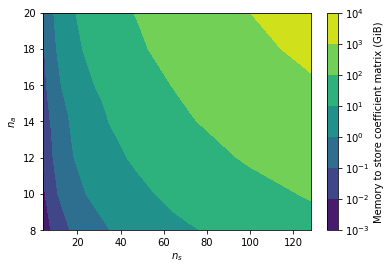

In [29]:
plt.figure(figsize=(6, 4))
plt.contourf(ns, na, sizes/2**30, norm=color_norm)
plt.colorbar(label='Memory to store coefficient matrix (GiB)')
plt.xlabel('$n_s$')
plt.ylabel('$n_a$')
plt.savefig('/scratch/kelp-figures/memory_store.pdf')

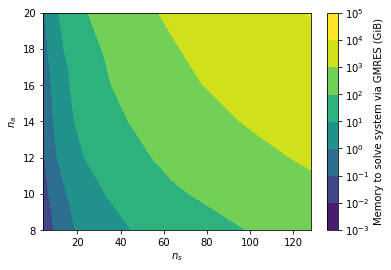

In [30]:
plt.figure(figsize=(6, 4))
plt.contourf(ns, na, 5*sizes/2**30, norm=color_norm)
plt.colorbar(label='Memory to solve system via GMRES (GiB)')
plt.xlabel('$n_s$')
plt.ylabel('$n_a$')
plt.savefig('/scratch/kelp-figures/memory_solve.pdf')

In [11]:
print(human_readable.to_latex())

\begin{tabular}{llllllll}
\toprule
{} &          8  &          10 &          12 &          14 &          16 &          18 &          20 \\
\midrule
4   &    1.36 MiB &    3.51 MiB &    7.61 MiB &   14.59 MiB &   25.57 MiB &   41.88 MiB &      65 MiB \\
8   &   10.91 MiB &   28.15 MiB &   60.94 MiB &  116.79 MiB &   204.7 MiB &  335.17 MiB &   520.2 MiB \\
16  &    87.4 MiB &  225.34 MiB &  487.76 MiB &  934.67 MiB &     1.6 GiB &    2.62 GiB &    4.06 GiB \\
32  &  699.61 MiB &    1.76 GiB &    3.81 GiB &     7.3 GiB &    12.8 GiB &   20.95 GiB &   32.52 GiB \\
48  &    2.31 GiB &    5.94 GiB &   12.87 GiB &   24.65 GiB &    43.2 GiB &   70.73 GiB &  109.76 GiB \\
64  &    5.47 GiB &   14.09 GiB &    30.5 GiB &   58.43 GiB &   102.4 GiB &  167.65 GiB &  260.18 GiB \\
72  &    7.78 GiB &   20.06 GiB &   43.42 GiB &    83.2 GiB &   145.8 GiB &   238.7 GiB &  370.45 GiB \\
100 &   20.86 GiB &   53.76 GiB &  116.34 GiB &  222.91 GiB &  390.63 GiB &  639.54 GiB &  992.51 GiB \\
128 &   43.7

FD via LIS/GMRES seems to require about 5x the memory for one such array

In [12]:
sizes = calc_size(ns, na)
x5 = pd.DataFrame(apply_to_array(lambda x: hf.format_size(x, binary=True), 5*sizes), columns=na_vals, index=ns_vals)
x5

,8,10,12,14,16,18,20
4,6.81 MiB,17.57 MiB,38.05 MiB,72.94 MiB,127.87 MiB,209.39 MiB,325.01 MiB
8,54.57 MiB,140.74 MiB,304.7 MiB,583.96 MiB,1023.51 MiB,1.64 GiB,2.54 GiB
16,437.01 MiB,1.1 GiB,2.38 GiB,4.56 GiB,8 GiB,13.1 GiB,20.32 GiB
32,3.42 GiB,8.81 GiB,19.06 GiB,36.52 GiB,64 GiB,104.77 GiB,162.6 GiB
48,11.53 GiB,29.72 GiB,64.33 GiB,123.25 GiB,215.99 GiB,353.63 GiB,548.8 GiB
64,27.34 GiB,70.46 GiB,152.48 GiB,292.16 GiB,512 GiB,838.24 GiB,1.27 TiB
72,38.92 GiB,100.32 GiB,217.11 GiB,415.99 GiB,729 GiB,1.17 TiB,1.81 TiB
100,104.29 GiB,268.79 GiB,581.7 GiB,1.09 TiB,1.91 TiB,3.12 TiB,4.85 TiB
128,218.72 GiB,563.7 GiB,1.19 TiB,2.28 TiB,4 TiB,6.55 TiB,10.16 TiB


In [13]:
print(x5.to_latex())

\begin{tabular}{llllllll}
\toprule
{} &          8  &          10 &          12 &          14 &           16 &          18 &          20 \\
\midrule
4   &    6.81 MiB &   17.57 MiB &   38.05 MiB &   72.94 MiB &   127.87 MiB &  209.39 MiB &  325.01 MiB \\
8   &   54.57 MiB &  140.74 MiB &   304.7 MiB &  583.96 MiB &  1023.51 MiB &    1.64 GiB &    2.54 GiB \\
16  &  437.01 MiB &     1.1 GiB &    2.38 GiB &    4.56 GiB &        8 GiB &    13.1 GiB &   20.32 GiB \\
32  &    3.42 GiB &    8.81 GiB &   19.06 GiB &   36.52 GiB &       64 GiB &  104.77 GiB &   162.6 GiB \\
48  &   11.53 GiB &   29.72 GiB &   64.33 GiB &  123.25 GiB &   215.99 GiB &  353.63 GiB &   548.8 GiB \\
64  &   27.34 GiB &   70.46 GiB &  152.48 GiB &  292.16 GiB &      512 GiB &  838.24 GiB &    1.27 TiB \\
72  &   38.92 GiB &  100.32 GiB &  217.11 GiB &  415.99 GiB &      729 GiB &    1.17 TiB &    1.81 TiB \\
100 &  104.29 GiB &  268.79 GiB &   581.7 GiB &    1.09 TiB &     1.91 TiB &    3.12 TiB &    4.85 TiB \\
128

In [2]:
!echo $OMP_NUM_THREADS

32
